# Random Forest Model

Random Forest:
    
It uses number of decision tree

Ensemble technique( N number of samples and on each sample a DT is created)

Each tree does a prediction and at the end Votes are taken

#-----------------------------------------------------------------------------#

for example if you have 1000 records and you are going to build 100 trees, your 100 samples are created randomly few samples may have 50 records and 3 cols other samples may have different combination of records.

finally each tree take the decision individually.

final decision is taken by the voting, records can be duplicated also - ramdomly maximum vote is for class 1 or class 0

https://miro.medium.com/max/1000/1*VHDtVaDPNepRglIAv72BFg.jpeg

In [2]:
import pandas as pd
cr =  pd.read_csv("CreditRisk.csv")

In [3]:
cr.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [3]:
cr.isnull().sum() # null values

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
cr.Gender        = cr.Gender.fillna('Male')
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.Credit_History =  cr.Credit_History.fillna(0)
cr.Dependents  = cr.Dependents.fillna(0)
cr.LoanAmount  = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term  = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Married           = cr.Married.fillna("Yes")

In [5]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
cr.Gender.replace({"Male" :1 , "Female":0} ,inplace = True)
cr.Married.replace({"No" :0 , "Yes":1} , inplace = True)
cr.Education.replace({"Graduate" :1  , "Not Graduate":0} , inplace = True)
cr.Self_Employed.replace({"No":0 , "Yes" :1 }, inplace = True)
cr.Property_Area.replace({"Semiurban" :1 ,"Urban": 2 , "Rural" :3} , inplace = True)
cr.Loan_Status.replace({"Y" :1 , "N" : 0}, inplace = True)

In [7]:
cr_x = cr.iloc[: ,1:12]
cr_y = cr.iloc[: , -1]

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
cr_x_train , cr_x_test ,cr_y_train , cr_y_test = train_test_split(cr_x , cr_y , test_size = .2 , random_state = 101)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rfc = RandomForestClassifier(n_estimators = 100)
# 100 number of trees are built/ called as hyper parameter
# if you keep on increase trees after somepoint it will become stable / no difference
# more number of trees might leads to overfitted problem also

In [11]:
rfc.fit(cr_x_train, cr_y_train)

RandomForestClassifier()

In [12]:
pred_rf=rfc.predict(cr_x_test )
pred_rf

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [13]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_rf , cr_y_test)
tab1

array([[ 31,  20],
       [ 26, 120]], dtype=int64)

In [14]:
tab1.diagonal().sum() / tab1.sum() * 100

76.6497461928934

In [15]:
rfc.feature_importances_ # check the feature importance in RF also

array([0.02021889, 0.02409542, 0.0451106 , 0.02198937, 0.02063566,
       0.22002867, 0.10925899, 0.19744755, 0.05452585, 0.23599011,
       0.05069887])

In [17]:
feature_score = pd.DataFrame({"Importance" : rfc.feature_importances_ , " Variable_Name"
: cr_x_train.columns})
feature_score

,Importance,Variable_Name
0,0.020219,Gender
1,0.024095,Married
2,0.045111,Dependents
3,0.021989,Education
4,0.020636,Self_Employed
5,0.220029,ApplicantIncome
6,0.109259,CoapplicantIncome
7,0.197448,LoanAmount
8,0.054526,Loan_Amount_Term
9,0.235990,Credit_History


In [18]:
feature_score.sort_values(['Importance'] , ascending = False )

,Importance,Variable_Name
9,0.235990,Credit_History
5,0.220029,ApplicantIncome
7,0.197448,LoanAmount
6,0.109259,CoapplicantIncome
8,0.054526,Loan_Amount_Term
10,0.050699,Property_Area
2,0.045111,Dependents
1,0.024095,Married
3,0.021989,Education
4,0.020636,Self_Employed


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(cr_y_test, pred_rf)

0.766497461928934

In [20]:
aa = list() # empty list
for i in range(1,100):
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(cr_x_train, cr_y_train)
    pred_rf=rfc.predict(cr_x_test )
    tab = confusion_matrix(pred_rf , cr_y_test)
    acc = tab.diagonal().sum() / tab.sum()
    aa.append(acc)

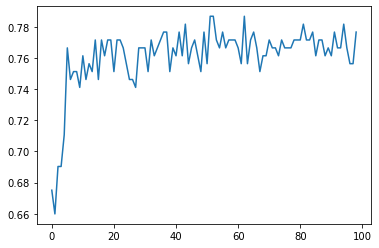

In [22]:
import matplotlib.pyplot as plt
plt.plot(aa)